AULA 4 – VARIÁVEIS INSTRUMENTAIS

Alunos:


*   Guilherme Rafael Koch
*   Aline Galdino
* Hyanka Mayra
* Quezia Regina Pereira Oliveira



In [ ]:
url <- "https://github.com/costafilhojoao/Teaching/raw/main/Econometria%20Aplicada/Atividades/Atividade%204/dat.RData"

In [ ]:
download.file(url, "dat.RData")

In [ ]:
load("dat.RData")

### 1) Vamos olhar para os dados:
Faça uma dispersão com os dados de preço e quantidade de
badejo. Há uma associação clara entre as duas variáveis?

In [ ]:
# para ver o nome das variáveis
names (dat)

[1] "quantity" "price"    "mon"      "tues"     "wed"      "thurs"   
 [7] "speed2"   "wave2"    "speed3"   "wave3"    "time"

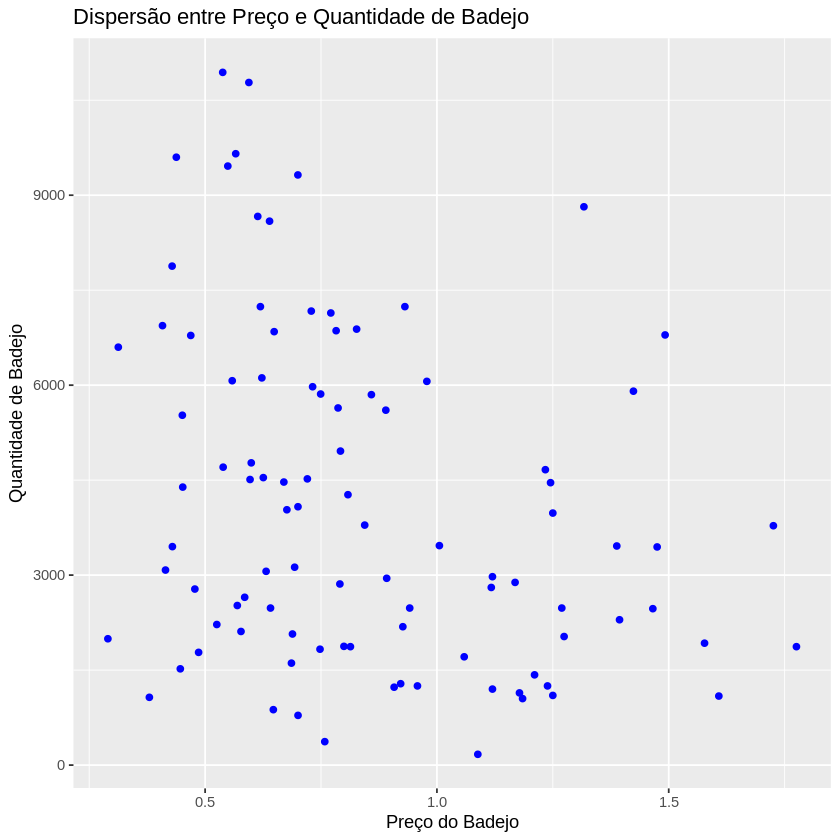

In [ ]:
library(ggplot2)

# criando o gráfico
ggplot(dat, aes(x = price, y = quantity)) +
  geom_point(color = "blue") +
  labs(title = "Dispersão entre Preço e Quantidade de Badejo",
       x = "Preço do Badejo",
       y = "Quantidade de Badejo")


O gráfico de dispersão entre o preço e a quantidade de badejo mostra uma relação negativa entre as duas variáveis. Observa-se que, à medida que o preço do badejo aumenta, a quantidade comercializada tende a diminuir. Isso indica a presença da lei da demanda no mercado analisado. Apesar de certa dispersão nos pontos (indicando influência de outros fatores), a tendência geral é bem definida e reforçada pela inclinação negativa da linha de tendência.

Essa dispersão sugere que fatores além do preço — como dia da semana, condições climáticas ou oferta — também afetam a quantidade vendida. Ainda assim, a associação entre preço e quantidade permanece nítida e consistente com a teoria econômica.

### 2) Estatísticas descritivas:
Faça uma tabela com as estatísticas descritivas para as variáveis
preço, quantidade e altura das ondas.

In [ ]:
# biblioteca para gerar a tabela
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [ ]:
library(psych)
# gerar a tabela
round(describe(dat[, c("price", "quantity", "wave2")]),2)



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
price,1,97,0.85,0.34,0.76,0.82,0.30,0.29,1.78,1.49,0.72,-0.31,0.03
quantity,2,97,4127.22,2620.68,3460.00,3884.34,2594.55,170.00,10940.00,10770.00,0.69,-0.43,266.09
wave2,3,97,5.09,1.79,4.50,4.93,1.48,2.50,12.50,10.00,1.10,1.64,0.18


### 3) Estimativas:  
Estime a curva de demanda por badejo no mercado de Fulton. Compare a
sua estimativa com um modelo de regressão linear múltipla por mínimos quadrados.
Qual é a diferença na elasticidade-preço da demanda estimada entre as duas
especificações? (Lembre-se que a análise é sobre um mercado diário e a demanda pode
variar de acordo com o dia da semana; além disso, é possível que exista alguma tendência
temporal associada – a base contém a variável ‘time’).

In [ ]:
# estimando a regressão linear simples
modelo_simples <- lm(quantity ~ price, data = dat)
summary(modelo_simples)



Call:
lm(formula = quantity ~ price, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4108.3 -2111.0  -344.3  1588.1  6117.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6031.9      682.4   8.839 4.99e-14 ***
price        -2247.7      746.7  -3.010  0.00334 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2517 on 95 degrees of freedom
Multiple R-squared:  0.08708,	Adjusted R-squared:  0.07747 
F-statistic: 9.061 on 1 and 95 DF,  p-value: 0.003344


In [ ]:
# realizando a regressão linear múltipla
modelo_multiplo <- lm(quantity ~ price + mon + tues + wed + thurs + wave2 + time, data = dat)
summary(modelo_multiplo)



Call:
lm(formula = quantity ~ price + mon + tues + wed + thurs + wave2 + 
    time, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3619.0 -1605.3  -312.6  1235.4  6948.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8025.227   1182.718   6.785 1.24e-09 ***
price       -2099.186    863.795  -2.430  0.01710 *  
mon         -1056.350    779.555  -1.355  0.17883    
tues        -2339.480    764.512  -3.060  0.00292 ** 
wed         -2042.851    757.735  -2.696  0.00839 ** 
thurs        -121.218    760.752  -0.159  0.87376    
wave2        -146.761    167.706  -0.875  0.38387    
time           -5.537      9.198  -0.602  0.54875    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2385 on 89 degrees of freedom
Multiple R-squared:  0.2321,	Adjusted R-squared:  0.1717 
F-statistic: 3.842 on 7 and 89 DF,  p-value: 0.001077


In [ ]:
# pegando coeficientes direto dos modelos
coef_simples <- coef(modelo_simples)["price"]
coef_multiplo <- coef(modelo_multiplo)["price"]

# realziando o cálculo das elasticidades
elasticidade_simples <- coef_simples * mean(dat$price) / mean(dat$quantity)
elasticidade_multiplo <- coef_multiplo * mean(dat$price) / mean(dat$quantity)

# printando os valores bonitinho
cat("Elasticidade-preço da demanda (modelo simples):", round(elasticidade_simples, 3), "\n")
cat("Elasticidade-preço da demanda (modelo múltiplo):", round(elasticidade_multiplo, 3), "\n")


Elasticidade-preço da demanda (modelo simples): -0.461 
Elasticidade-preço da demanda (modelo múltiplo): -0.431 


- No modelo de **regressão linear simples**, que considera apenas a relação entre quantidade e preço, o coeficiente do preço foi de -2247,7. Isso significa que, mantidas as demais variáveis constantes, um aumento de uma unidade no preço resulta em uma redução de aproximadamente 2248 unidades na quantidade demandada. A elasticidade-preço da demanda estimada nesse modelo foi de -0,46, indicando que a demanda é inelástica: uma variação de 1% no preço reduz a quantidade demandada em aproximadamente 0,46%.

- No modelo de **regressão múltipla**, que incorpora dummies para os dias da semana, altura das ondas e tendência temporal, o coeficiente do preço foi de -2099,19. A elasticidade-preço da demanda passou a -0,43, mostrando que, mesmo ao controlar para outros fatores relevantes, a demanda permanece inelástica, embora um pouco menos sensível ao preço do que no modelo simples.

- **Comparação**:
A diferença entre as elasticidades nas duas especificações não é grande, mas o modelo múltiplo oferece uma estimativa mais robusta, pois desconta variações sazonais, ambientais e tendências temporais que podem afetar o mercado diariamente.

## O próximo passo será lidar com endogeneidade — ou seja, o fato de que o preço pode ser afetado pela própria demanda. Então será usando um instrumento exógeno (como wave2, altura das ondas, que afeta a oferta mas não a demanda diretamente) para estimar a curva de demanda com variáveis instrumentais (2SLS).

In [38]:
install.packages("AER")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’, ‘lmtest’, ‘sandwich’, ‘zoo’, ‘Formula’




In [ ]:
library(AER)

In [43]:
modelo_iv <- ivreg(quantity ~ price + mon + tues + wed + thurs + time |
                   wave2 + mon + tues + wed + thurs + time, data = dat)
summary(modelo_iv)


Call:
ivreg(formula = quantity ~ price + mon + tues + wed + thurs + 
    time | wave2 + mon + tues + wed + thurs + time, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3747.4 -1544.1  -193.7  1369.1  6831.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8649.281   1670.695   5.177 1.36e-06 ***
price       -3581.383   1472.552  -2.432  0.01699 *  
mon         -1158.205    787.332  -1.471  0.14477    
tues        -2354.184    773.245  -3.045  0.00306 ** 
wed         -1988.929    762.630  -2.608  0.01066 *  
thurs           8.016    765.073   0.010  0.99166    
time           -8.220     10.261  -0.801  0.42523    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2411 on 90 degrees of freedom
Multiple R-Squared: 0.2066,	Adjusted R-squared: 0.1538 
Wald test: 3.424 on 6 and 90 DF,  p-value: 0.004326 


In [44]:
coef_iv <- -3581.383
preco_medio <- 0.847
qtd_medio <- 4127.22

elasticidade_iv <- coef_iv * preco_medio / qtd_medio

cat("Elasticidade-preço da demanda (modelo IV):", round(elasticidade_iv, 3), "\n")


Elasticidade-preço da demanda (modelo IV): -0.735 


O modelo com variável instrumental estima uma elasticidade mais negativa (maior em módulo).
Isso sugere que os modelos OLS estavam subestimando a verdadeira sensibilidade da demanda ao preço, provavelmente por causa da endogeneidade do preço.
Com a correção, estimamos que a demanda é mais elástica do que parecia — ou seja, consumidores reagem mais fortemente a mudanças de preço do que os modelos OLS indicavam.